## Supplementary figure 2, delta between N=2 and N=4 clients
(Not included in paper)

hetrogeniety_among_clients_PDBP
|                          | (True, 'uniform')   | (False, 'uniform')   | (False, 'linear')   |
|:-------------------------|:--------------------|:---------------------|:--------------------|
| (2, 'FedAvg LR')         | 0.8264 ± 0.0114     | 0.8224 ± 0.005       | 0.8355 ± 0.0075     |
| (2, 'FedAvg MLP')        | 0.7801 ± 0.0123     | 0.787 ± 0.0142       | 0.7947 ± 0.0103     |
| (2, 'FedAvg SGD')        | 0.8475 ± 0.008      | 0.8254 ± 0.0157      | 0.8356 ± 0.0083     |
| (2, 'FedAvg XGBRF')      | 0.876 ± 0.009       | 0.8688 ± 0.0106      | 0.8626 ± 0.0124     |
| (2, 'FedProx μ = 0 LR')  | 0.8233 ± 0.0145     | 0.8251 ± 0.0153      | 0.8301 ± 0.0132     |
| (2, 'FedProx μ = 0 MLP') | 0.7907 ± 0.0065     | 0.7894 ± 0.0061      | 0.798 ± 0.0082      |
| (2, 'FedProx μ = 2 LR')  | 0.8352 ± 0.0075     | 0.8254 ± 0.0075      | 0.8245 ± 0.0107     |
| (2, 'FedProx μ = 2 MLP') | 0.7852 ± 0.0148     | 0.7836 ± 0.0172      | 0.8033 ± 0.0087     |
| (4, 'F

hetrogeniety_among_clients_PPMI
|                          | (True, 'uniform')   | (False, 'uniform')   | (False, 'linear')   |
|:-------------------------|:--------------------|:---------------------|:--------------------|
| (2, 'FedAvg LR')         | 0.8737 ± 0.0416     | 0.8769 ± 0.0301      | 0.9028 ± 0.0493     |
| (2, 'FedAvg MLP')        | 0.8725 ± 0.0717     | 0.8772 ± 0.064       | 0.8791 ± 0.0643     |
| (2, 'FedAvg SGD')        | 0.9198 ± 0.0249     | 0.9074 ± 0.0492      | 0.9058 ± 0.0384     |
| (2, 'FedAvg XGBRF')      | 0.9241 ± 0.0146     | 0.9044 ± 0.033       | 0.9141 ± 0.0317     |
| (2, 'FedProx μ = 0 LR')  | 0.8873 ± 0.0415     | 0.8723 ± 0.0493      | 0.8862 ± 0.0285     |
| (2, 'FedProx μ = 0 MLP') | 0.872 ± 0.0606      | 0.8826 ± 0.0655      | 0.8729 ± 0.0713     |
| (2, 'FedProx μ = 2 LR')  | 0.9061 ± 0.0404     | 0.866 ± 0.033        | 0.875 ± 0.0427      |
| (2, 'FedProx μ = 2 MLP') | 0.8681 ± 0.0603     | 0.8677 ± 0.0671      | 0.8795 ± 0.056      |
| (4, 'F

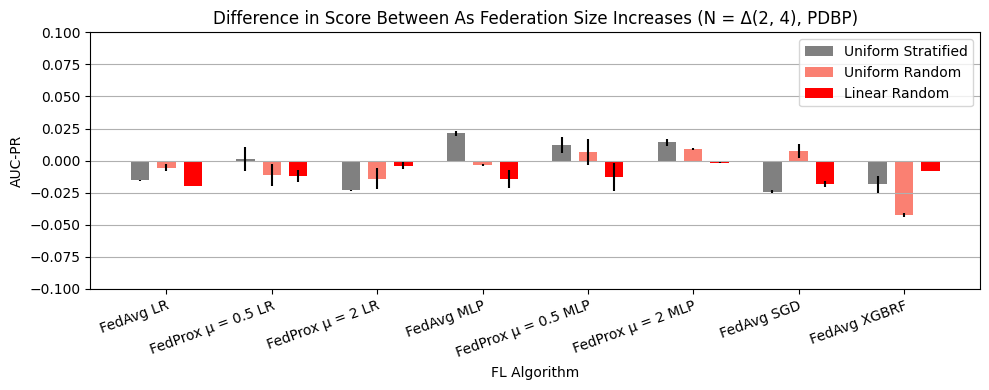

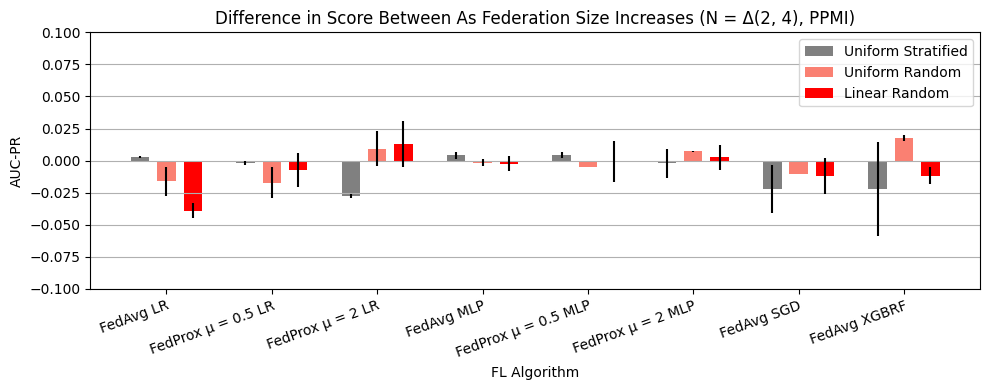

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# where to output figures and tables
BASE_OUTPUT_PATH = '/home/bdanek2/multi-omics-pdd-FL-study/federated_learning_multi_modality_ancestry/multi_modality_fl/results/repro-generated_figures_tables'

dataset = "PDBP"
metric = "auc_precision_recall"

def heterogenity_delta(dataset: str, tables_path: str, metric: str = "auc_precision_recall"):

    us_table = (f'k_averaged_results_table_k_all {dataset} Uniform Stratified test.csv', True)
    ur_table = (f'k_averaged_results_table_k_all {dataset} Uniform Random test.csv', False)
    lr_table = (f'k_averaged_results_table_k_all {dataset} Linear Random test.csv', False)

    tables = []
    for table_file_name, stratified in [us_table, ur_table, lr_table]: # remove LR
        table = pd.read_csv(os.path.join(tables_path, table_file_name))
        table = pd.concat([table[table['num_clients'] == 2], table[table['num_clients'] == 4]])
        # display(table.columns)
        table['algorithm_name'] = table['algorithm_name'].apply(lambda x: x.replace('Classifier', '') if type(x) == str else x)
        table = table.round(4)
        table[f"str_{metric}"] = table[metric].astype(str) + ' ± ' + table[f"{metric}_std"].astype(str)

        table['stratified'] = stratified
        tables.append(table)

    tables = pd.concat(tables)

    # table_figure = tables.set_index(['algorithm_name']).pivot(columns='num_clients')[metric]
    table_figure = tables.set_index(['num_clients', 'algorithm_name']).pivot(columns=['stratified', 'split_method'])[f"str_{metric}"]

    table_figure.to_csv(os.path.join(tables_path, f'hetrogeniety_among_clients_{dataset}.csv'))
    
    print("=====================================")
    print(f'hetrogeniety_among_clients_{dataset}')
    print(table_figure.to_markdown())

    cli_2 = tables.set_index(['num_clients', 'algorithm_name', 'split_method', 'stratified']).loc[2]
    cli_4 = tables.set_index(['num_clients', 'algorithm_name', 'split_method', 'stratified']).loc[4]
    delta_table = pd.concat([cli_4[metric] - cli_2[metric], (cli_4[f'{metric}_std'] - cli_2[f'{metric}_std']).abs()], axis=1).reset_index()
    raw_dt = delta_table.copy()
    # display(delta_table)
    delta_table[metric] = delta_table[metric].round(4).astype(str) + '±' + delta_table[f'{metric}_std'].round(4).astype(str)
    delta_table = delta_table.set_index(['algorithm_name']).pivot(columns=['stratified', 'split_method'])[metric]
    # display(delta_table)

    delta_table.to_csv(os.path.join(tables_path, f'hetrogeniety_among_clients_delta_{dataset}.csv'))

    print("")
    print(f'hetrogeniety_among_clients_delta_{dataset}')
    print(delta_table.to_markdown())

    raw_dt = raw_dt.set_index(['algorithm_name', 'split_method', 'stratified'])

    colors = [
        'gray',
        'salmon',
        'red'
    ]


    # plot the delta table

    bar_width = 0.35
    group_centers = []

    f, ax = plt.subplots()
    f.set_figheight(4)
    f.set_figwidth(10)

    t = tables[tables['num_clients'] == 2]
    std_ = f"{metric}_std"

    loc = 0.5
    alg_name = 'FedAvg LR'
    score = raw_dt.loc[alg_name, 'uniform', True][metric]
    error = raw_dt.loc[alg_name, 'uniform', True][std_]
    ax.bar(loc, score, bar_width, label='Uniform Stratified', color=colors[0], yerr=error, align='edge')

    loc = 1
    score = raw_dt.loc[alg_name, 'uniform', False][metric]
    error = raw_dt.loc[alg_name, 'uniform', False][std_]
    ax.bar(loc, score, bar_width, label='Uniform Random', color=colors[1], yerr=error, align='edge')

    loc = 1.5
    score = raw_dt.loc[alg_name, 'linear', False][metric]
    error = raw_dt.loc[alg_name, 'linear', False][std_]
    ax.bar(loc, score, bar_width, label='Linear Random', color=colors[2], yerr=error, align='edge')
    group_centers.append(1 + bar_width / 2)


    loc = 2.5
    alg_name = 'FedProx μ = 0 LR'
    score = raw_dt.loc[alg_name, 'uniform', True][metric]
    error = raw_dt.loc[alg_name, 'uniform', True][std_]
    ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    loc = 3.0
    score = raw_dt.loc[alg_name, 'uniform', False][metric]
    error = raw_dt.loc[alg_name, 'uniform', False][std_]
    ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    loc = 3.5
    score = raw_dt.loc[alg_name, 'linear', False][metric]
    error = raw_dt.loc[alg_name, 'linear', False][std_]
    ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    group_centers.append(3 + bar_width / 2)


    loc = 4.5
    alg_name = 'FedProx μ = 2 LR'
    score = raw_dt.loc[alg_name, 'uniform', True][metric]
    error = raw_dt.loc[alg_name, 'uniform', True][std_]
    ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    loc = 5.0
    score = raw_dt.loc[alg_name, 'uniform', False][metric]
    error = raw_dt.loc[alg_name, 'uniform', False][std_]
    ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    loc = 5.5
    score = raw_dt.loc[alg_name, 'linear', False][metric]
    error = raw_dt.loc[alg_name, 'linear', False][std_]
    ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    group_centers.append(5 + bar_width / 2)


    # loc = 6.5
    # alg_name = 'FedProx μ = 5 LR'
    # score = raw_dt.loc[alg_name, 'uniform', True][metric]
    # error = raw_dt.loc[alg_name, 'uniform', True][std_]
    # ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    # loc = 7.0
    # score = raw_dt.loc[alg_name, 'uniform', False][metric]
    # error = raw_dt.loc[alg_name, 'uniform', False][std_]
    # ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    # loc = 7.5
    # score = raw_dt.loc[alg_name, 'linear', False][metric]
    # error = raw_dt.loc[alg_name, 'linear', False][std_]
    # ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    # group_centers.append(7 + bar_width / 2)


    # loc = 8.5
    # alg_name = 'FedProx μ = 8 LR'
    # score = raw_dt.loc[alg_name, 'uniform', True][metric]
    # error = raw_dt.loc[alg_name, 'uniform', True][std_]
    # ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    # loc = 9.0
    # score = raw_dt.loc[alg_name, 'uniform', False][metric]
    # error = raw_dt.loc[alg_name, 'uniform', False][std_]
    # ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    # loc = 9.5
    # score = raw_dt.loc[alg_name, 'linear', False][metric]
    # error = raw_dt.loc[alg_name, 'linear', False][std_]
    # ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    # group_centers.append(9 + bar_width / 2)


    loc = 6.5
    alg_name = 'FedAvg MLP'
    score = raw_dt.loc[alg_name, 'uniform', True][metric]
    error = raw_dt.loc[alg_name, 'uniform', True][std_]
    ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    loc = 7
    score = raw_dt.loc[alg_name, 'uniform', False][metric]
    error = raw_dt.loc[alg_name, 'uniform', False][std_]
    ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    loc = 7.5
    score = raw_dt.loc[alg_name, 'linear', False][metric]
    error = raw_dt.loc[alg_name, 'linear', False][std_]
    ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    group_centers.append(7 + bar_width / 2)


    loc = 8.5
    alg_name = 'FedProx μ = 0 MLP'
    score = raw_dt.loc[alg_name, 'uniform', True][metric]
    error = raw_dt.loc[alg_name, 'uniform', True][std_]
    ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    loc = 9
    score = raw_dt.loc[alg_name, 'uniform', False][metric]
    error = raw_dt.loc[alg_name, 'uniform', False][std_]
    ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    loc = 9.5
    score = raw_dt.loc[alg_name, 'linear', False][metric]
    error = raw_dt.loc[alg_name, 'linear', False][std_]
    ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    group_centers.append(9 + bar_width / 2)


    loc = 10.5
    alg_name = 'FedProx μ = 2 MLP'
    score = raw_dt.loc[alg_name, 'uniform', True][metric]
    error = raw_dt.loc[alg_name, 'uniform', True][std_]
    ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    loc = 11
    score = raw_dt.loc[alg_name, 'uniform', False][metric]
    error = raw_dt.loc[alg_name, 'uniform', False][std_]
    ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    loc = 11.5
    score = raw_dt.loc[alg_name, 'linear', False][metric]
    error = raw_dt.loc[alg_name, 'linear', False][std_]
    ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    group_centers.append(11 + bar_width / 2)


    # loc = 16.5
    # alg_name = 'FedProx μ = 5 MLP'
    # score = raw_dt.loc[alg_name, 'uniform', True][metric]
    # error = raw_dt.loc[alg_name, 'uniform', True][std_]
    # ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    # loc = 17
    # score = raw_dt.loc[alg_name, 'uniform', False][metric]
    # error = raw_dt.loc[alg_name, 'uniform', False][std_]
    # ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    # loc = 17.5
    # score = raw_dt.loc[alg_name, 'linear', False][metric]
    # error = raw_dt.loc[alg_name, 'linear', False][std_]
    # ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    # group_centers.append(17 + bar_width / 2)



    # loc = 18.5
    # alg_name = 'FedProx μ = 8 MLP'
    # score = raw_dt.loc[alg_name, 'uniform', True][metric]
    # error = raw_dt.loc[alg_name, 'uniform', True][std_]
    # ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    # loc = 19
    # score = raw_dt.loc[alg_name, 'uniform', False][metric]
    # error = raw_dt.loc[alg_name, 'uniform', False][std_]
    # ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    # loc = 19.5
    # score = raw_dt.loc[alg_name, 'linear', False][metric]
    # error = raw_dt.loc[alg_name, 'linear', False][std_]
    # ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    # group_centers.append(19 + bar_width / 2)



    loc = 12.5
    alg_name = 'FedAvg SGD'
    score = raw_dt.loc[alg_name, 'uniform', True][metric]
    error = raw_dt.loc[alg_name, 'uniform', True][std_]
    ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    loc = 13.0
    score = raw_dt.loc[alg_name, 'uniform', False][metric]
    error = raw_dt.loc[alg_name, 'uniform', False][std_]
    ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    loc = 13.5
    score = raw_dt.loc[alg_name, 'linear', False][metric]
    error = raw_dt.loc[alg_name, 'linear', False][std_]
    ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    group_centers.append(13 + bar_width / 2)


    loc = 14.5
    alg_name = 'FedAvg XGBRF'
    score = raw_dt.loc[alg_name, 'uniform', True][metric]
    error = raw_dt.loc[alg_name, 'uniform', True][std_]
    ax.bar(loc, score, bar_width, color=colors[0], yerr=error, align='edge')

    loc = 15
    score = raw_dt.loc[alg_name, 'uniform', False][metric]
    error = raw_dt.loc[alg_name, 'uniform', False][std_]
    ax.bar(loc, score, bar_width, color=colors[1], yerr=error, align='edge')

    loc = 15.5
    score = raw_dt.loc[alg_name, 'linear', False][metric]
    error = raw_dt.loc[alg_name, 'linear', False][std_]
    ax.bar(loc, score, bar_width, color=colors[2], yerr=error, align='edge')
    group_centers.append(15 + bar_width / 2)


    ax.set_xticks(group_centers)
    ax.set_xticklabels(['FedAvg LR', 'FedProx μ = 0.5 LR', 'FedProx μ = 2 LR', 'FedAvg MLP', 'FedProx μ = 0.5 MLP', 'FedProx μ = 2 MLP', 'FedAvg SGD', 'FedAvg XGBRF'], fontsize=10, rotation=20, ha="right", rotation_mode="anchor")

    ax.set_xlabel('FL Algorithm')
    ax.set_ylabel('AUC-PR')

    ax.grid(axis='y')
    ax.set_ylim(-0.1, 0.1)
    ax.legend()

    ax.set_title(f'Difference in Score Between As Federation Size Increases (N = Δ(2, 4), {dataset})')

    plt.tight_layout()

    plt.savefig(os.path.join(tables_path, f'hetrogeniety_visualization_among_clients_delta_{dataset}.png'), dpi=300)

heterogenity_delta("PDBP", BASE_OUTPUT_PATH, metric)
heterogenity_delta("PPMI", BASE_OUTPUT_PATH, metric)